In [177]:
%reset -f 

In [178]:
import numpy as np
import pandas as pd
import tensorflow as tf 

import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
from keras.datasets import mnist
(x_train_0, y_train_0),(x_test_0, y_test_0) = mnist.load_data()
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [180]:
x_train.shape 

(60000, 28, 28)

In [181]:
x_test.shape 

(10000, 28, 28)

In [182]:
y_train.shape

(60000,)

In [183]:
y_test.shape

(10000,)

In [184]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

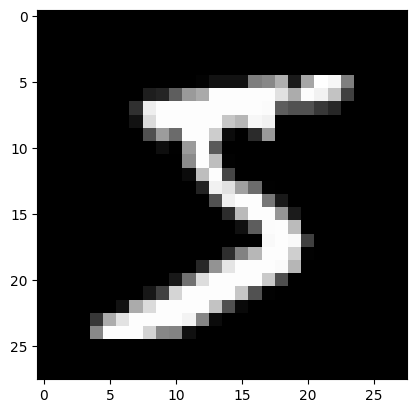

In [185]:
plt.imshow(x_train[0],cmap='gray')

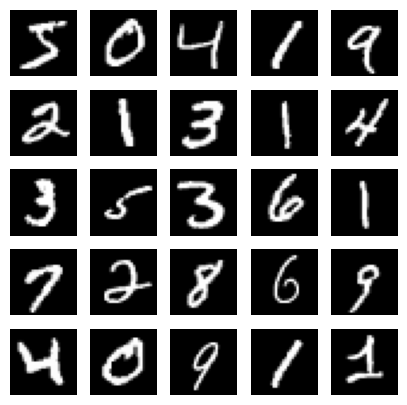

In [186]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = x_train[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

In [187]:
x_train = np.reshape(x_train, [-1,28*28])
x_train = x_train.astype('float32') / 255
x_train.shape

(60000, 784)

In [188]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [189]:
import tensorflow as tf 
model = tf.keras.Sequential([
     tf.keras.Input(shape=(784)),
    tf.keras.layers.Dense(2,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    
])

In [190]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 1570      
                                                                 
 dense_25 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


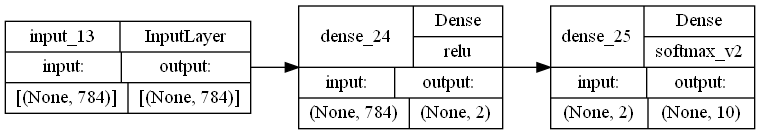

In [191]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    rankdir='LR', #TB/LR
    show_layer_activations=True
)

In [192]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1,verbose=1)

1875/1875 [==============================] - 5s 3ms/step - loss: 1.6010 - accuracy: 0.4268


In [193]:
x_test = np.reshape(x_test, [-1,28*28])
loss, acc = model.evaluate(x_test, y_test)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 167.4614 - accuracy: 0.4059
0.4059000015258789


In [194]:
model.predict(x_train_0[0].reshape(-1,28*28))

1/1 [==============================] - 0s 37ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Convolutional Net

In [208]:
%reset -f 
import numpy as np
import pandas as pd
import tensorflow as tf 

import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
(x_train_0, y_train_0),(x_test_0, y_test_0) = mnist.load_data()
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# x_train = np.reshape(x_train, [-1,28*28])
x_train = x_train.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

import tensorflow as tf 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    
])

In [209]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_32 (Dense)            (None, 10)                54090     
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
Total params: 54,520
Trainable params: 54,520
Non-trainable params: 0
_________________________________________________

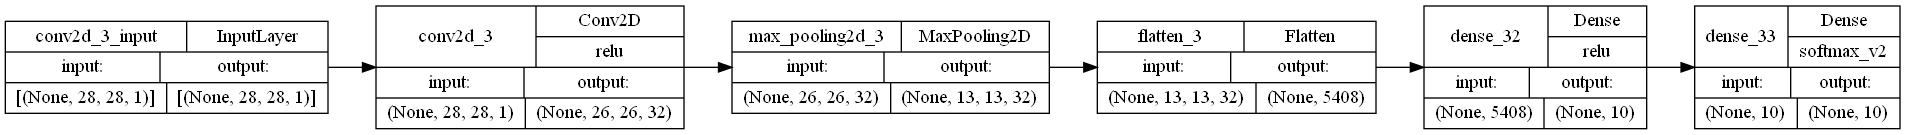

In [210]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    rankdir='LR', #TB/LR
    show_layer_activations=True
)

In [211]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4182 - accuracy: 0.8730


In [212]:
loss, acc = model.evaluate(x_test, y_test)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 56.5527 - accuracy: 0.8855
0.8855000138282776
